In [1]:
from additional_test_set import AdditionalTestSet

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from imblearn.ensemble import BalancedRandomForestClassifier

from simple_ml_models import *
from utils import *
from additional_test_set_visualisation import Visualisation
from dimension_reduction import display_umap_2d_plot, display_pca_2d_plot, display_tsne_2d_plot

2023-05-19 19:28:09.981928: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_data_path = "data/CTC_new_28_12_2022/countsTrainNew.tsv"
test_data_path = "data/CTC_new_28_12_2022/countsTestNew.tsv"
train_classes_path = "data/CTC_new_28_12_2022/sampleInfoTrain.tsv"
test_classes_path = "data/CTC_new_28_12_2022/sampleInfoTest.tsv"
SEED = 42

data_object = AdditionalTestSet(
    train_data_path, test_data_path, train_classes_path, test_classes_path
)
data_object.summary()

Total cells number in train data: 29154
CTC cells number in train data: 1534
WBC cells number in train data: 27620
CTC-WBC cells number in test data: 0

Total cells number in test data: 357
CTC cells number in test data: 262
WBC cells number in test data: 81
CTC-WBC cells number in test data: 14


In [3]:
cut_by_mean_train_data, cut_by_mean_test_data = AdditionalTestSet.cut_data_by_mean(
    data_object.train_data, data_object.test_data, threshold=0.6
)
(
    cut_by_mean_max_train_data,
    cut_by_mean_max_test_data,
) = AdditionalTestSet.cut_data_by_max(
    cut_by_mean_train_data, cut_by_mean_test_data, threshold=7
)
print(f"Feature number: {len(cut_by_mean_max_train_data.columns)}")

Feature number: 46


In [4]:
calculate_global_statistics(cut_by_mean_max_train_data, data_object.train_classes)

CTC mean: 0.4373665308215022
WBC mean: 1.2744774043271798
CTC standard deviation: 0.9740472308696775
WBC standard deviation: 1.100896074935635
CTC non-zero values: 27.52820134912987 %
WBC non-zero values: 60.12797909517363 %
T-test p-values: 0.0


/home/melehean/miniconda3/envs/gumed/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


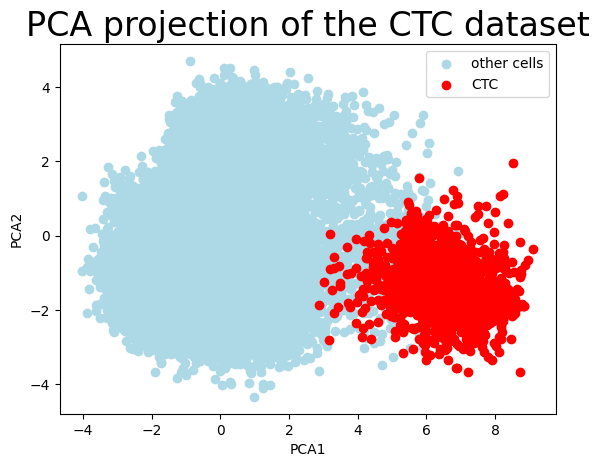

In [5]:
display_pca_2d_plot(cut_by_mean_max_train_data, data_object.train_classes, 42)

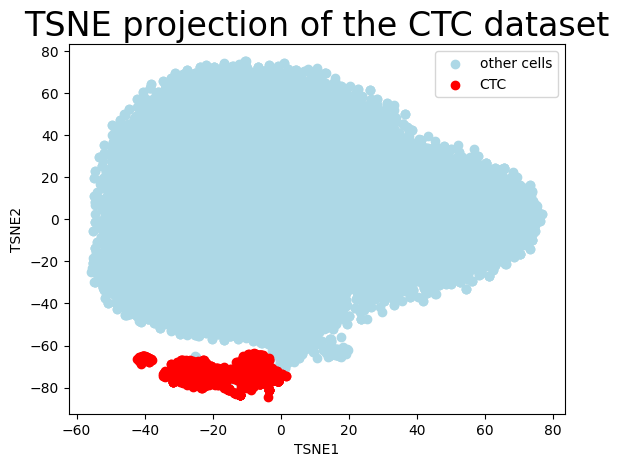

In [6]:
display_tsne_2d_plot(cut_by_mean_max_train_data, data_object.train_classes, 42)

In [4]:
cut_by_mean_with_classes_train_data, cut_by_mean_with_classes_test_data = data_object.cut_data_by_mean_with_classes(
    data_object.train_data, data_object.test_data, threshold=0.5
)
print(f"Feature number: {len(cut_by_mean_with_classes_train_data.columns)}")

Feature number: 59


In [8]:
calculate_global_statistics(cut_by_mean_with_classes_train_data, data_object.train_classes)

CTC mean: 0.783926484496173
WBC mean: 1.1376248675477092
CTC standard deviation: 1.1229087708081462
WBC standard deviation: 1.1082728238979702
CTC non-zero values: 47.14273086867169 %
WBC non-zero values: 54.12106186870236 %


/home/melehean/miniconda3/envs/gumed/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


T-test p-values: 0.0


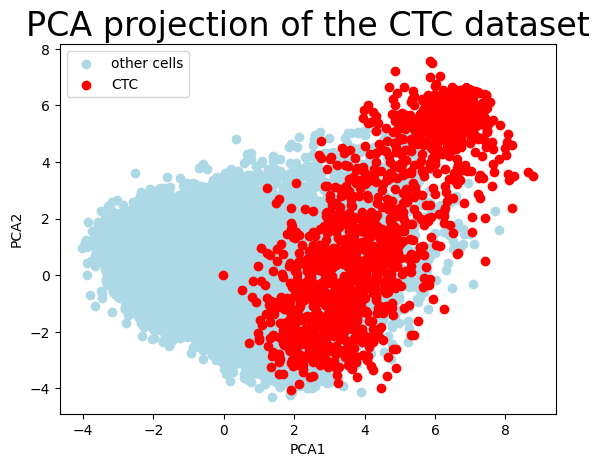

In [9]:
display_pca_2d_plot(cut_by_mean_with_classes_train_data, data_object.train_classes, 42)

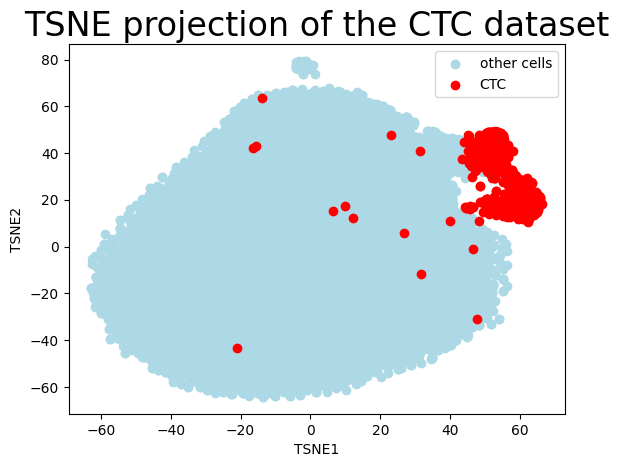

In [10]:
display_tsne_2d_plot(cut_by_mean_with_classes_train_data, data_object.train_classes, 42)

In [5]:
biological_features = pd.read_csv("features/macrophages_vs_others_gbm_emt_v2_2023-05-17.tsv", sep=",")
biological_features = np.array(biological_features["Symbol"])
cut_by_mean_with_classes_features = np.array(cut_by_mean_with_classes_train_data.columns)
cut_by_mean_max_features = np.array(cut_by_mean_max_train_data.columns)
cut_by_mean_with_classes_common_features = np.intersect1d(biological_features, cut_by_mean_with_classes_features)
cut_by_mean_max_common_features = np.intersect1d(biological_features, cut_by_mean_max_features)

print(f"Common features for cut by mean with classes: {cut_by_mean_with_classes_common_features}")
print(f"Common features for cut by mean and max: {cut_by_mean_max_common_features}")

Common features for cut by mean with classes: []
Common features for cut by mean and max: []


### Biological features

In [6]:
biological_features = np.intersect1d(biological_features, data_object.train_data.columns)
biological_features_train_data = data_object.train_data[biological_features]
biological_features_test_data = data_object.test_data[biological_features]

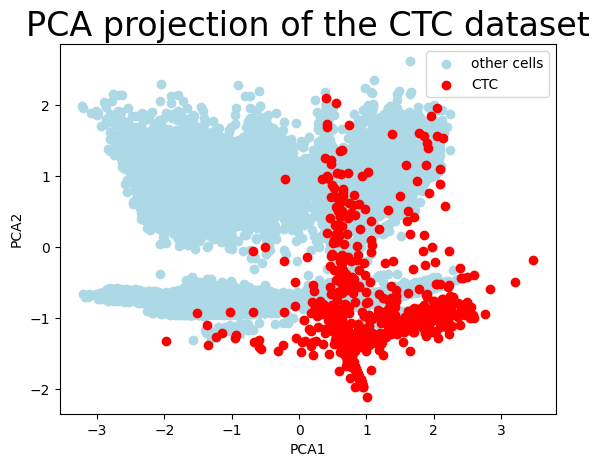

In [7]:
display_pca_2d_plot(biological_features_train_data, data_object.train_classes, 42)

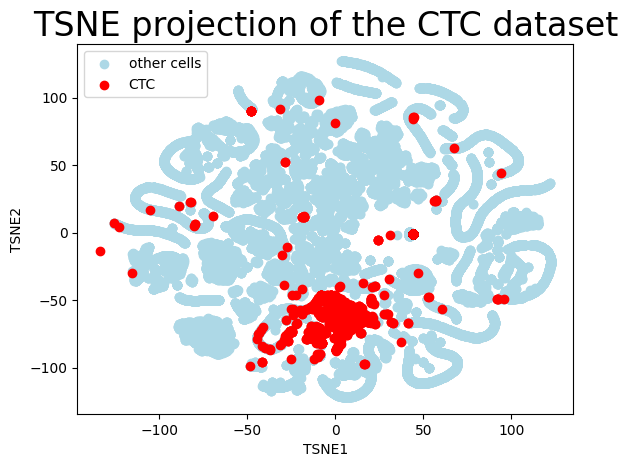

In [13]:
display_tsne_2d_plot(biological_features_train_data, data_object.train_classes, 42)

### Cut by mean max and biological

In [7]:
cut_by_mean_max_features_merged = np.concatenate((cut_by_mean_max_features, biological_features))
cut_by_mean_max_merged_train_data = data_object.train_data[cut_by_mean_max_features_merged]
cut_by_mean_max_merged_test_data = data_object.test_data[cut_by_mean_max_features_merged]

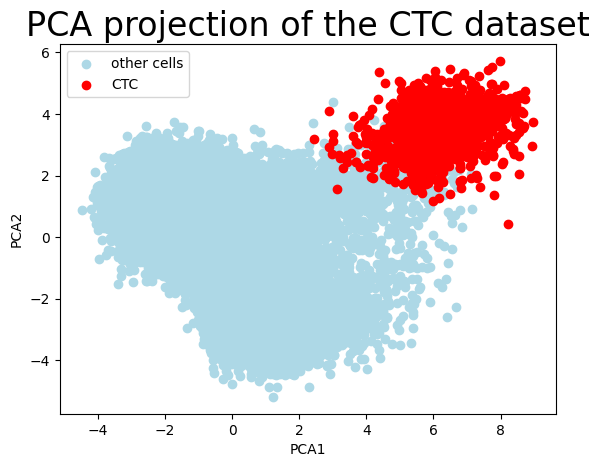

In [12]:
display_pca_2d_plot(cut_by_mean_max_merged_train_data, data_object.train_classes, 42)

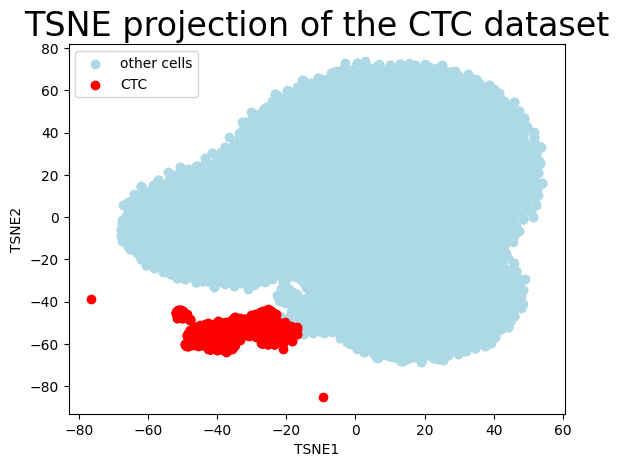

In [14]:
display_tsne_2d_plot(cut_by_mean_max_merged_train_data, data_object.train_classes, 42)

### Cut by mean with classes and biological

In [8]:
cut_by_mean_with_classes_features_merged = np.concatenate((cut_by_mean_with_classes_features, biological_features))
cut_by_mean_with_classes_merged_train_data = data_object.train_data[cut_by_mean_with_classes_features_merged]
cut_by_mean_with_classes_merged_test_data = data_object.test_data[cut_by_mean_with_classes_features_merged]

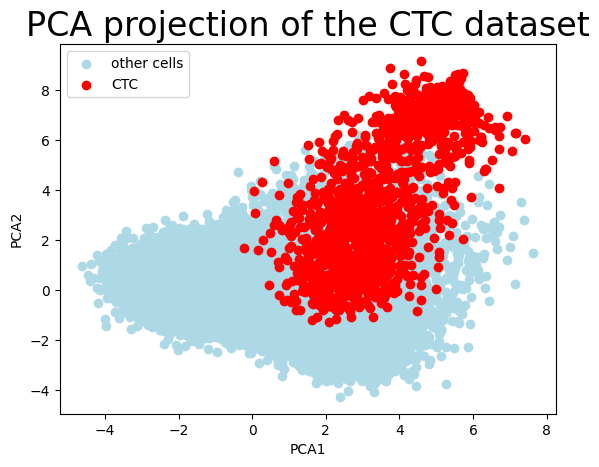

In [17]:
display_pca_2d_plot(cut_by_mean_with_classes_merged_train_data, data_object.train_classes, 42)

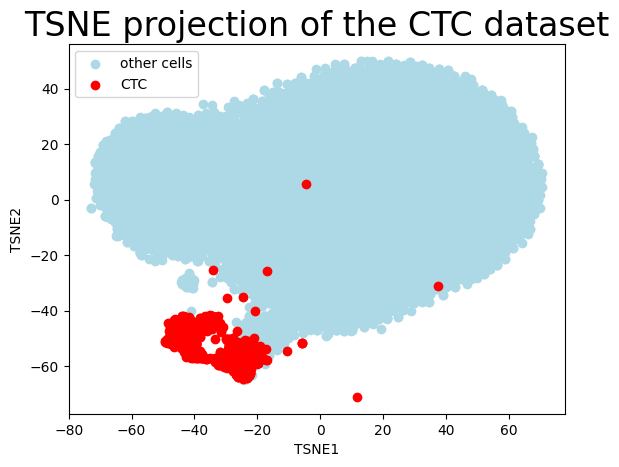

In [18]:
display_tsne_2d_plot(cut_by_mean_with_classes_merged_train_data, data_object.train_classes, 42)

### LightGBM

In [15]:
lgbm_clf = LGBMClassifier(
    boosting_type="gbdt",
    min_child_weight=0.01,
    max_depth=10,
    num_leaves=16,
    n_estimators=2000,
    subsample_for_bin=10000,
    is_unbalance=True,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [16]:
lgbm_model_object = Model(
    lgbm_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()


Validation balanced accuracy 0.9261536052426407
Training balanced accuracy 0.9521812732743942

Validation roc auc 0.9805213695030739
Training roc auc 0.9898339557240089

Validation precision 0.35605869603343115
Training precision 0.3688870192565303

Validation recall 0.949809911121983
Training recall 1.0

Validation f1 0.5167072926111425
Training f1 0.5385187577395872



In [17]:
lgbm_model_object.display_test_results()


Test balanced accuracy 0.5202630166398282

Test roc auc 0.48845947396672035

Test precision 0.7842944884878023

Test recall 0.6207729468599034

Test f1 score 0.6920137060844853


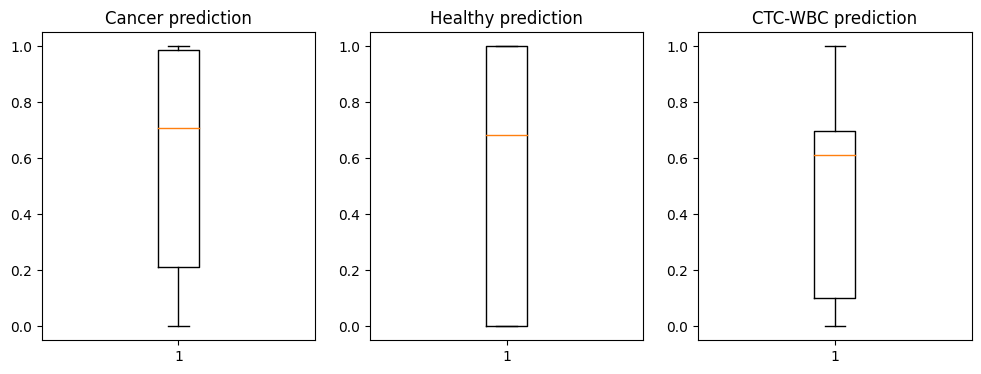

In [18]:
vis = Visualisation(lgbm_estimators, biological_features_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

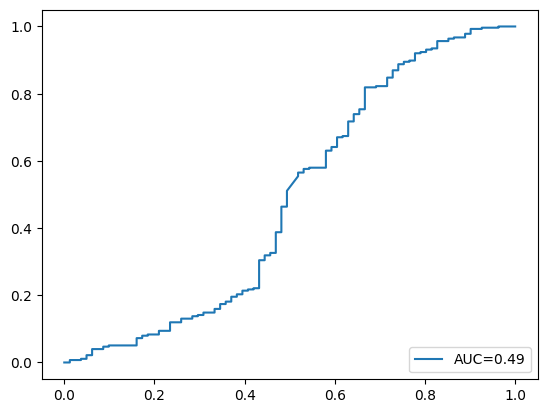

In [19]:
vis.draw_roc_curve_from_probabilities()

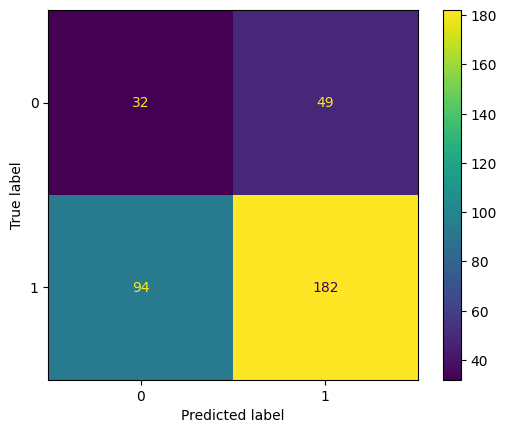

In [20]:
vis.display_confusion_matrix()

In [23]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
TWISTNB,19152.000000
MYCBP2-AS1,9074.000000
MYCBP,257.333333
ZEB1,236.000000
MYC,223.333333
ZEB1-AS1,172.000000
SNAI3,157.333333
MYCBP2,154.666667
ZEB2,132.666667
SNAI3-AS1,79.666667


### Cut by mean max and biological

In [48]:
lgbm_model_object = Model(
    lgbm_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()

Validation balanced accuracy 0.9975920921233133
Training balanced accuracy 1.0

Validation roc auc 0.9999871053045305
Training roc auc 1.0

Validation precision 0.9546709235425189
Training precision 1.0

Validation recall 0.9980443268917156
Training recall 1.0

Validation f1 0.9749337894731772
Training f1 1.0



In [49]:
lgbm_model_object.display_test_results()


Test balanced accuracy 0.7899445339058865

Test roc auc 0.8723683425776824

Test precision 0.9486426992024007

Test recall 0.7198067632850241

Test f1 score 0.8164503914238518


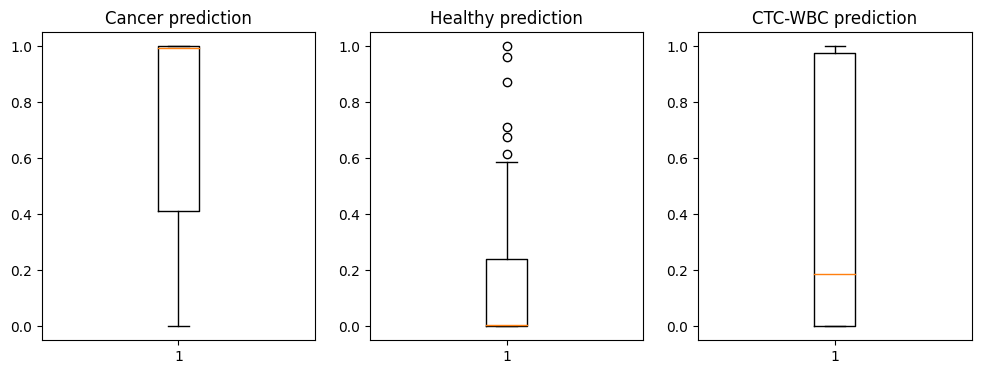

In [50]:
vis = Visualisation(lgbm_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

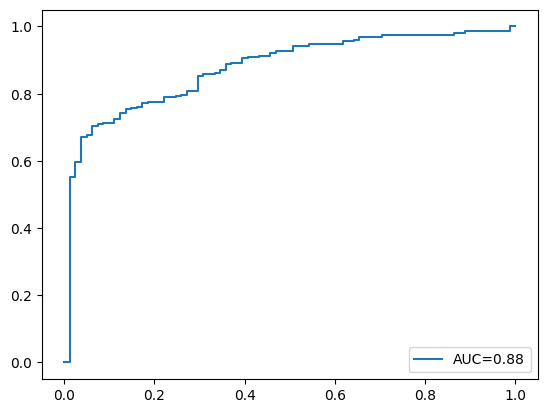

In [51]:
vis.draw_roc_curve_from_probabilities()

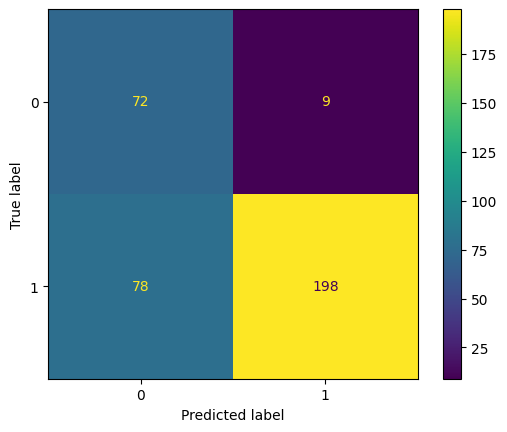

In [52]:
vis.display_confusion_matrix()

In [53]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
UBE2D3,710.333333
SRRM2,481.000000
PPIA,468.333333
NAP1L1,420.666667
RPS11,214.000000
TUBB4B,207.666667
HLA-E,206.333333
YWHAB,156.333333
KLF6,112.333333
MYCBP2-AS1,111.333333


### Cut by mean with classes and biological

In [54]:
lgbm_model_object = Model(
    lgbm_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()

Validation balanced accuracy 0.9985692884386301
Training balanced accuracy 1.0

Validation roc auc 0.9999963871740608
Training roc auc 1.0

Validation precision 0.995446485879078
Training precision 1.0

Validation recall 0.9973920111709068
Training recall 1.0

Validation f1 0.9964164014148092
Training f1 1.0



In [55]:
lgbm_model_object.display_test_results()

Test balanced accuracy 0.6685900876722132

Test roc auc 0.8141438539989264

Test precision 0.9314944314944315

Test recall 0.45652173913043476

Test f1 score 0.5890961168938142


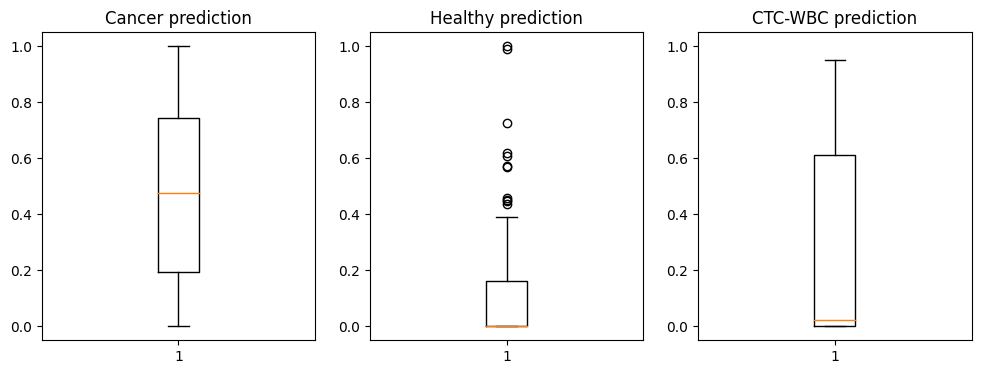

In [56]:
vis = Visualisation(lgbm_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

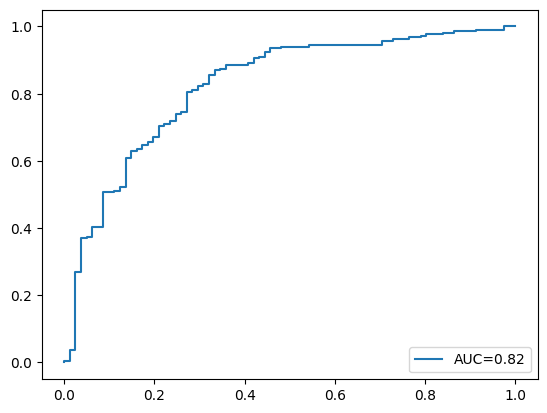

In [57]:
vis.draw_roc_curve_from_probabilities()

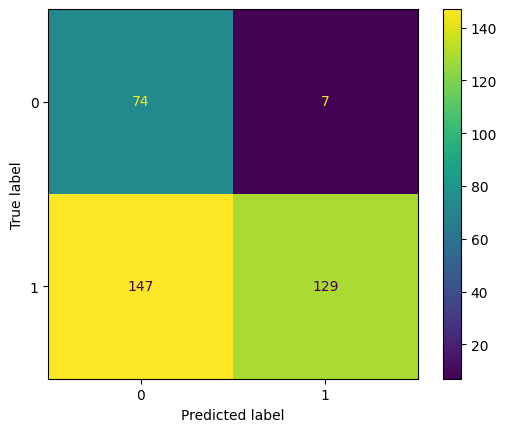

In [58]:
vis.display_confusion_matrix()

In [59]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
SRRM2,1193.333333
HLA-C,1009.333333
MYCBP2-AS1,227.000000
ACTB,207.666667
RPS15A,156.333333
...,...
CKLF,0.666667
SAP18,0.666667
SNAI1,0.333333
MYCBP,0.333333


### XGBoost

In [24]:
healthy_cells_train_indices = np.where(data_object.train_classes == 0)[0]
cancer_cells_train_indices = np.where(data_object.train_classes == 1)[0]

class_weight = len(healthy_cells_train_indices) / len(cancer_cells_train_indices)

xgb_clf = XGBClassifier(
    booster="gbtree",
    eta=0.2,
    min_child_weight=48,  # Jedyna zmiana w porownaniu do poprzedniego podzialu
    max_depth=8,
    gamma=0.01,   
    scale_pos_weight=class_weight,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [25]:
xgboost_model_object = Model(
    xgb_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.9334196879370418
Training balanced accuracy 0.9411739131622436

Validation roc auc 0.9829862440721132
Training roc auc 0.9862244630649233

Validation precision 0.33232491460936164
Training precision 0.3345219219392792

Validation recall 0.9778467465753424
Training recall 0.9928296282693102

Validation f1 0.49512877367824587
Training f1 0.4999828801776885



In [26]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.5970432993379854

Test roc auc 0.6736819347527883

Test precision 0.8254652551394971

Test recall 0.6920289855072465

Test f1 score 0.7525392440325763


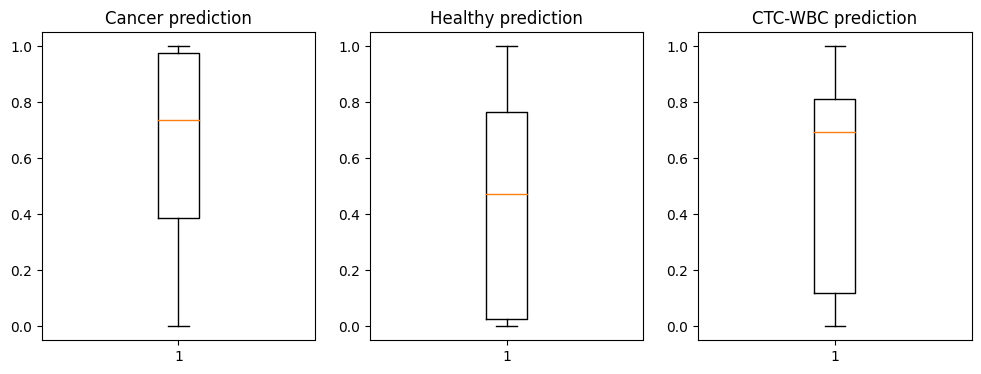

In [27]:
vis = Visualisation(xgboost_estimators, biological_features_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

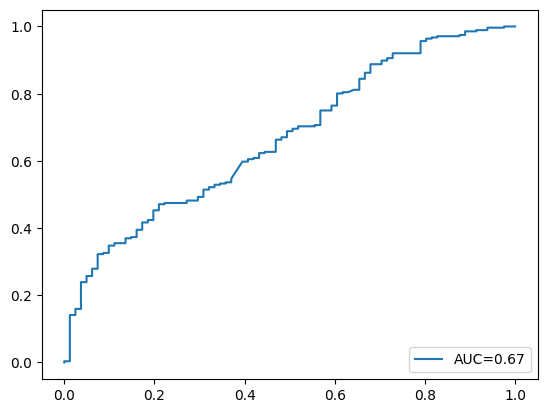

In [28]:
vis.draw_roc_curve_from_probabilities()

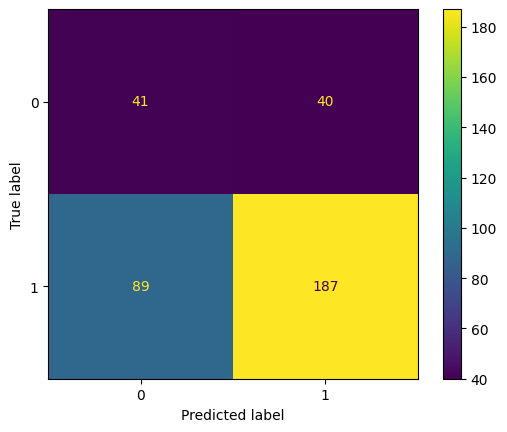

In [29]:
vis.display_confusion_matrix()

In [30]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
MYCBP2-AS1,0.394269
ZEB2,0.171014
MYCBP2,0.130815
CD14,0.092036
ZEB1,0.079305
MYC,0.071603
TWIST1,0.019026
MYCBP,0.018267
TWISTNB,0.013154
SNAI3,0.010510


### Cut by mean max and biological

In [60]:
xgboost_model_object = Model(
    xgb_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.9976463933529037
Training balanced accuracy 0.9989408342285598

Validation roc auc 0.9999236957530903
Training roc auc 0.9999841308883441

Validation precision 0.9377225319020653
Training precision 0.9687635255963464

Validation recall 0.9993476842791912
Training recall 0.9996738421395955

Validation f1 0.966081190972573
Training f1 0.9839674783165573



In [61]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.7216630882089818

Test roc auc 0.8451571539333212

Test precision 0.961099086099086

Test recall 0.5132850241545893

Test f1 score 0.6690291620524178


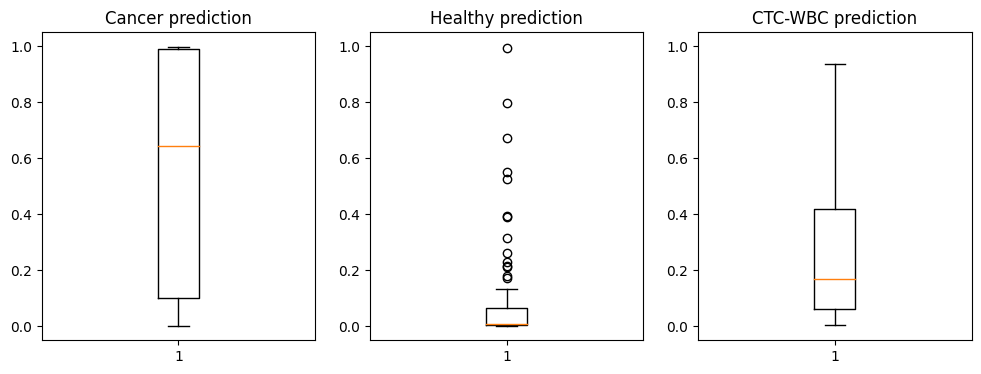

In [62]:
vis = Visualisation(xgboost_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

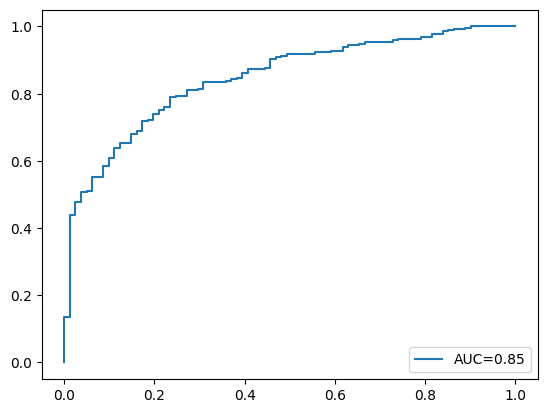

In [64]:
vis.draw_roc_curve_from_probabilities()

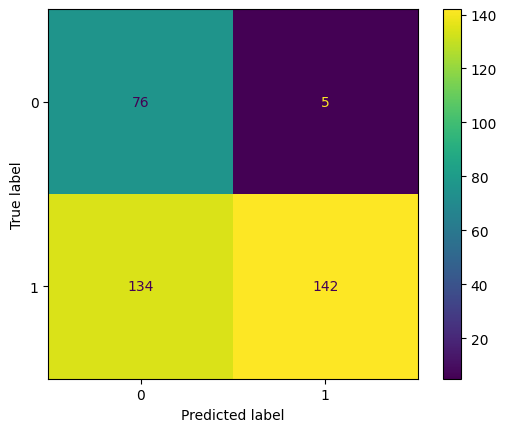

In [65]:
vis.display_confusion_matrix()

In [66]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
RPL10,0.844558
RPL29,0.106558
HLA-E,0.014963
BTF3,0.010589
RPL15,0.006303
VIM,0.006299
KLF6,0.002103
TUBB4B,0.001675
TWISTNB,0.001413
MYCBP2-AS1,0.001280


### Cut by mean with classes and biological

In [67]:
xgboost_model_object = Model(
    xgb_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.9975739683248827
Training balanced accuracy 0.9989409818435769

Validation roc auc 0.9999343357963474
Training roc auc 0.9999883790332085

Validation precision 0.9509674339197781
Training precision 0.963287461281479

Validation recall 0.9980443268917156
Training recall 1.0

Validation f1 0.9737730563939834
Training f1 0.9812952867173771



In [68]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.7756083378064055

Test roc auc 0.8776018369416115

Test precision 0.9594521888929783

Test recall 0.6582125603864735

Test f1 score 0.7690717525100609


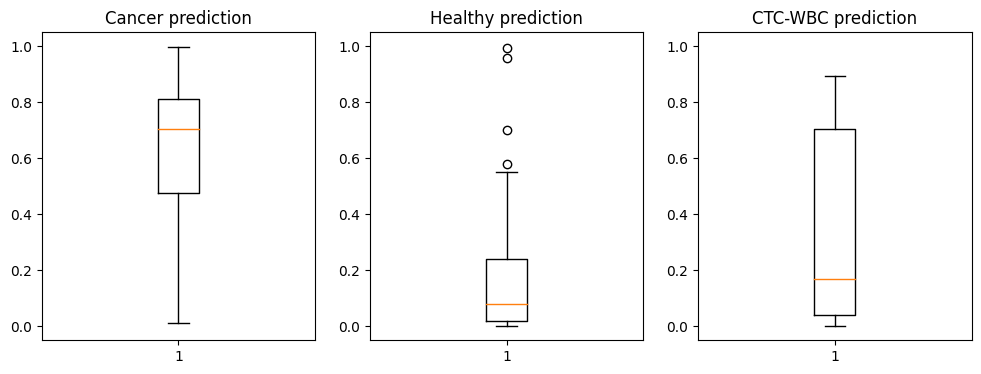

In [69]:
vis = Visualisation(xgboost_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

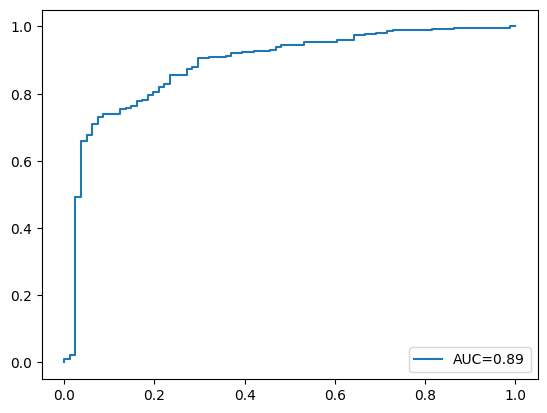

In [70]:
vis.draw_roc_curve_from_probabilities()

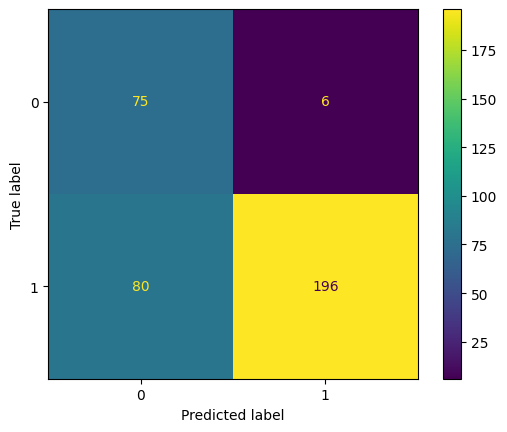

In [71]:
vis.display_confusion_matrix()

In [72]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
RPL26,0.484555
RPS15A,0.356916
ZEB2,0.028254
RPL18,0.026004
RPS26,0.017766
MYCBP2-AS1,0.016508
ACTB,0.011828
ERH,0.010267
TWISTNB,0.007811
HLA-C,0.006226


### Random Forest

In [73]:
rf_clf = RandomForestClassifier(  
    criterion="log_loss",
    n_estimators=2000,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [74]:
rf_model_object = Model(
    rf_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.8707242931490695
Training balanced accuracy 0.8973342413466142

Validation roc auc 0.9792092431821314
Training roc auc 0.9896108063266024

Validation precision 0.9456518940455503
Training precision 1.0

Validation recall 0.7438743476842792
Training recall 0.7946684826932285

Validation f1 0.8302918606606241
Training f1 0.8852218422513021



In [35]:
rf_model_object.display_test_results()

Test balanced accuracy 0.5136205045625335

Test roc auc 0.5784949603387607

Test precision 0.7894322781095514

Test recall 0.2741545893719807

Test f1 score 0.4056477857041238


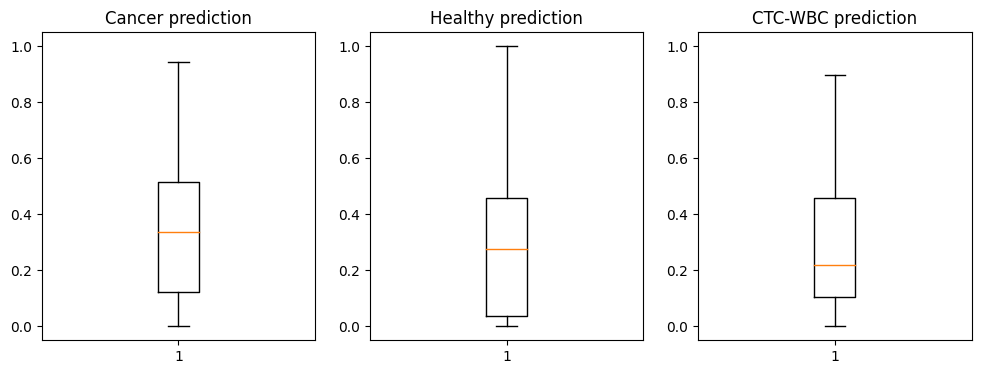

In [36]:
vis = Visualisation(rf_estimators, biological_features_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

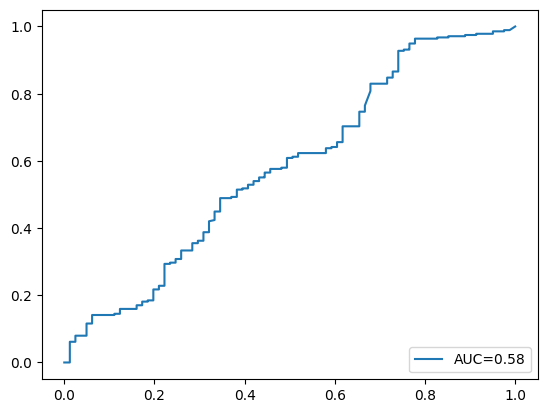

In [37]:
vis.draw_roc_curve_from_probabilities()

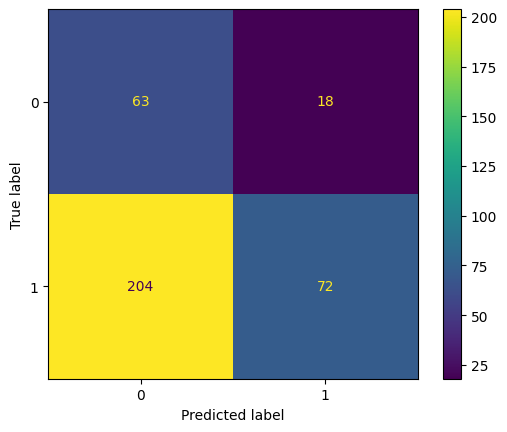

In [38]:
vis.display_confusion_matrix()

In [39]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
MYCBP2-AS1,0.411282
TWISTNB,0.174467
ZEB2,0.086651
MYCBP2,0.082880
MYC,0.062193
TWIST1,0.058226
ZEB1,0.036618
TWIST2,0.021787
CD14,0.018100
ZEB1-AS1,0.014983


### Cut by mean max and biological

In [75]:
rf_model_object = Model(
    rf_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.9981345195327315
Training balanced accuracy 1.0

Validation roc auc 0.999993092127427
Training roc auc 1.0

Validation precision 0.9916688620425779
Training precision 1.0

Validation recall 0.9967396954500979
Training recall 1.0

Validation f1 0.9941727652107133
Training f1 1.0



In [76]:
rf_model_object.display_test_results()

Test balanced accuracy 0.5900653068527465

Test roc auc 0.8242008111170751

Test precision 0.9623562209769106

Test recall 0.20893719806763286

Test f1 score 0.33622714195045034


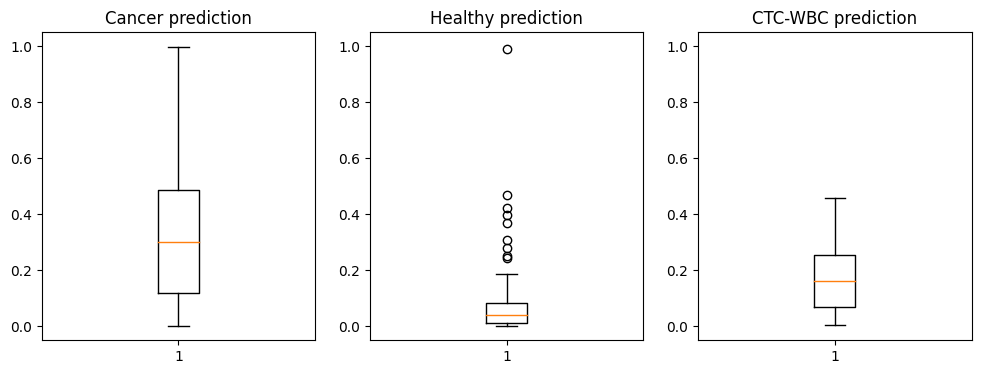

In [77]:
vis = Visualisation(rf_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

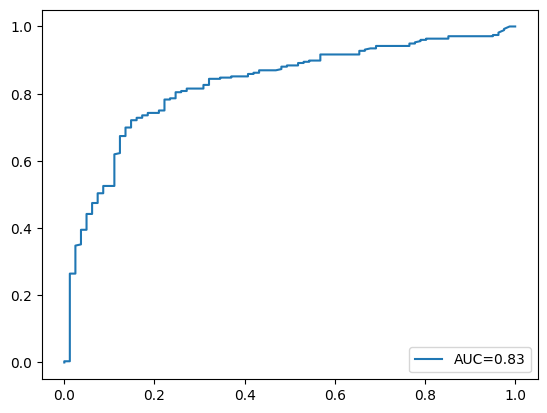

In [80]:
vis.draw_roc_curve_from_probabilities()

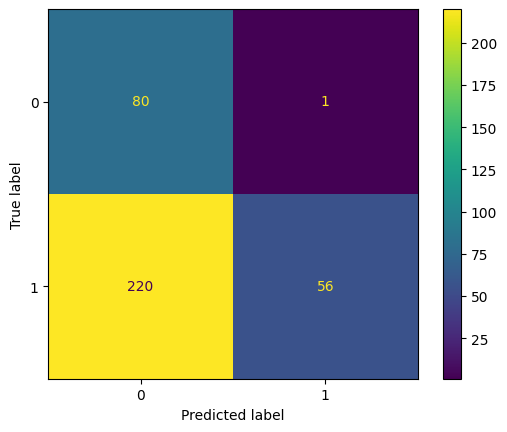

In [78]:
vis.display_confusion_matrix()

In [79]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
RPL10,0.193509
HLA-E,0.141172
RPL29,0.137099
RPL15,0.089962
BTF3,0.076833
...,...
SNAI3-AS1,0.000017
MYCN,0.000008
MYCBPAP,0.000006
SNAI1,0.000006


### Cut by mean with classes and biological

In [81]:
rf_model_object = Model(
    rf_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.9976470344108942
Training balanced accuracy 1.0

Validation roc auc 0.9999990790810215
Training roc auc 1.0

Validation precision 0.9973995958607581
Training precision 1.0

Validation recall 0.9954388861709068
Training recall 1.0

Validation f1 0.9964100111589351
Training f1 1.0



In [82]:
rf_model_object.display_test_results()

Test balanced accuracy 0.7599749507962068

Test roc auc 0.8770501580485477

Test precision 0.9779671779376184

Test recall 0.5652173913043478

Test f1 score 0.7114843743663366


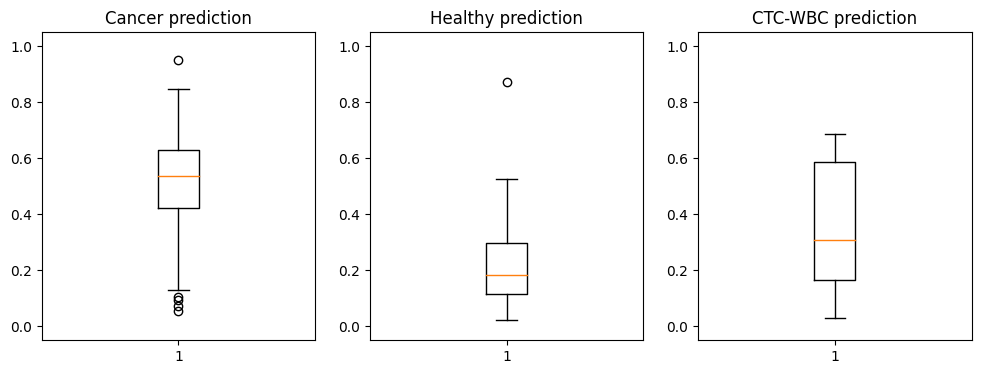

In [83]:
vis = Visualisation(rf_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

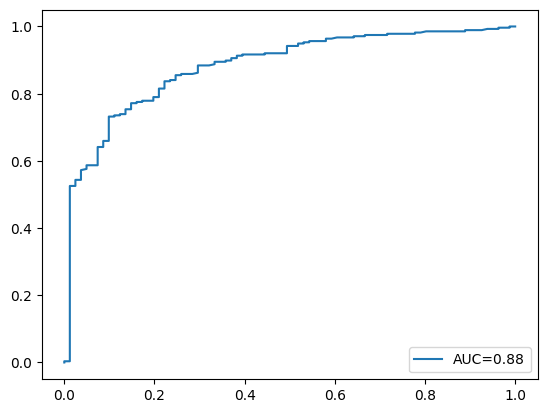

In [84]:
vis.draw_roc_curve_from_probabilities()

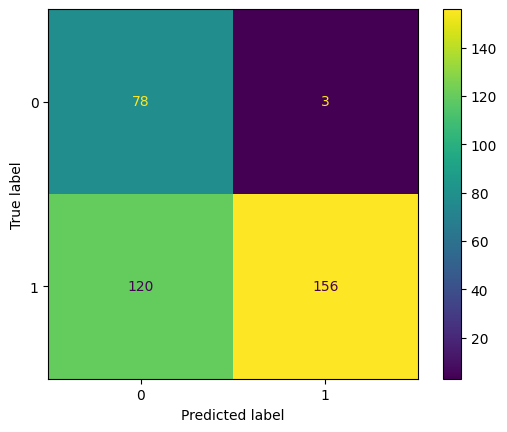

In [85]:
vis.display_confusion_matrix()

In [86]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
RPS15A,1.285267e-01
RPL26,1.228598e-01
ACTB,1.080469e-01
HLA-C,1.019215e-01
RPS26,8.430034e-02
...,...
SNAI3-AS1,2.857550e-05
SNAI2,1.225399e-05
SNAI1,8.272926e-06
MYCBPAP,2.894656e-06


### Balanced Random Forest

In [40]:
brf_clf = BalancedRandomForestClassifier(
    n_estimators=2000,
    class_weight="balanced",
    criterion="entropy",
    oob_score=True,  
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [41]:
brf_model_object = Model(
    brf_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.9327140891389248
Training balanced accuracy 0.9459538701767048

Validation roc auc 0.9694232722742923
Training roc auc 0.9797093954888497

Validation precision 0.3346211386899456
Training precision 0.3413732929863151

Validation recall 0.9745889901337247
Training recall 1.0

Validation f1 0.497455254597297
Training f1 0.5084261124917888



In [42]:
brf_model_object.display_test_results()

Test balanced accuracy 0.6012032563964932

Test roc auc 0.6392243692968331

Test precision 0.8309489051488237

Test recall 0.6509661835748792

Test f1 score 0.7279119466418992


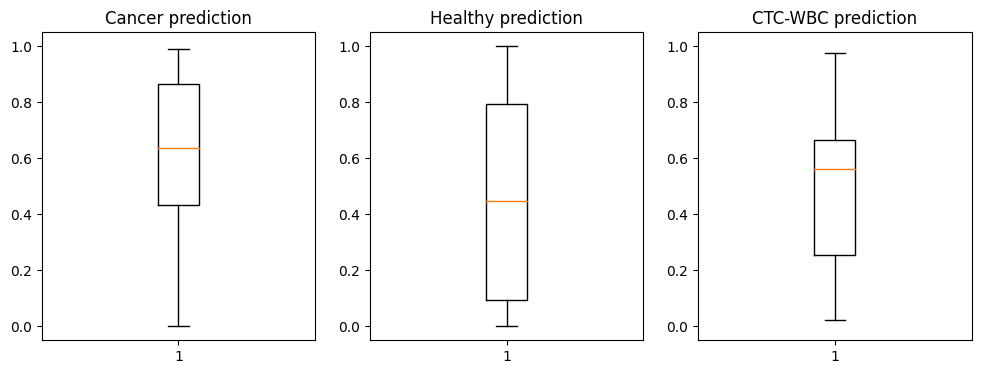

In [43]:
vis = Visualisation(brf_estimators, biological_features_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

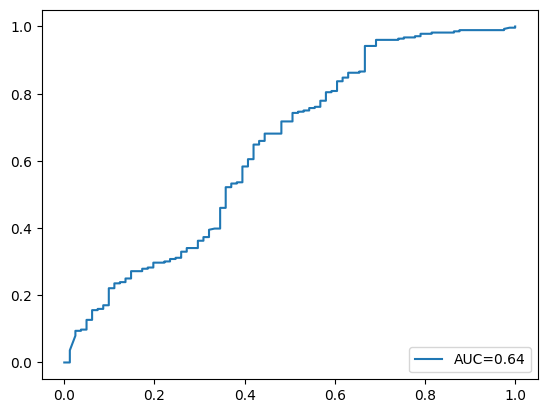

In [44]:
vis.draw_roc_curve_from_probabilities()

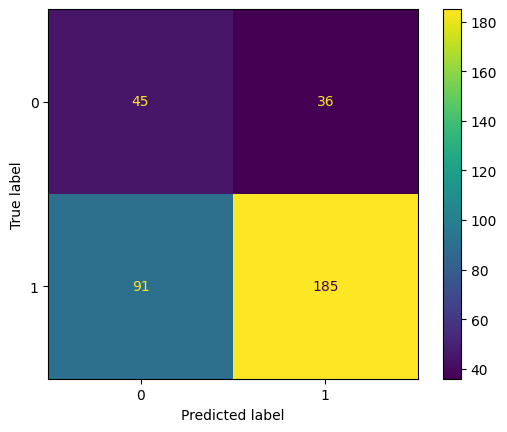

In [45]:
vis.display_confusion_matrix()

In [46]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
MYCBP2-AS1,0.207556
ZEB2,0.185374
MYCBP2,0.162137
TWISTNB,0.126417
MYC,0.101626
ZEB1,0.077152
CD14,0.063555
MYCBP,0.017701
TWIST1,0.013979
SNAI3,0.010828


### Cut by mean max and biological 

In [87]:
brf_model_object = Model(
    brf_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.9975015799364746
Training balanced accuracy 0.9992125310861958

Validation roc auc 0.9999704555603804
Training roc auc 0.9999989910419848

Validation precision 0.9339743393126767
Training precision 0.9724652982506726

Validation recall 0.9993476842791912
Training recall 1.0

Validation f1 0.9638885163655132
Training f1 0.9860295591114984



In [88]:
brf_model_object.display_test_results()

Test balanced accuracy 0.6789899803184828

Test roc auc 0.8132417844575653

Test precision 0.9381268935200975

Test recall 0.46497584541062803

Test f1 score 0.6195227711509791


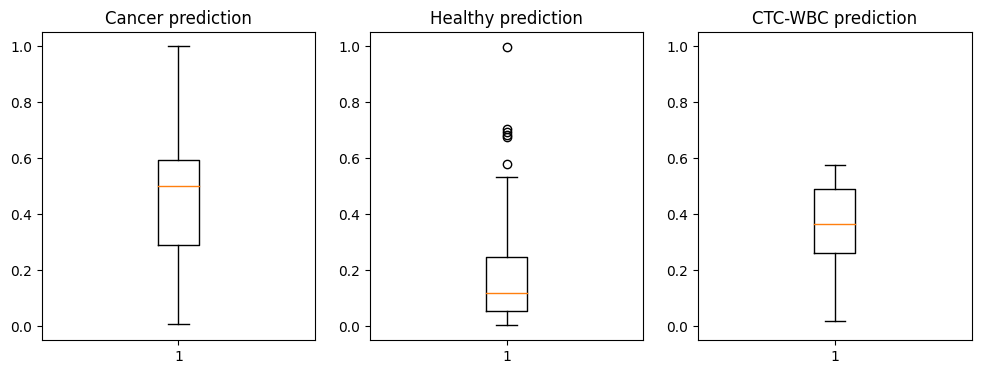

In [89]:
vis = Visualisation(brf_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

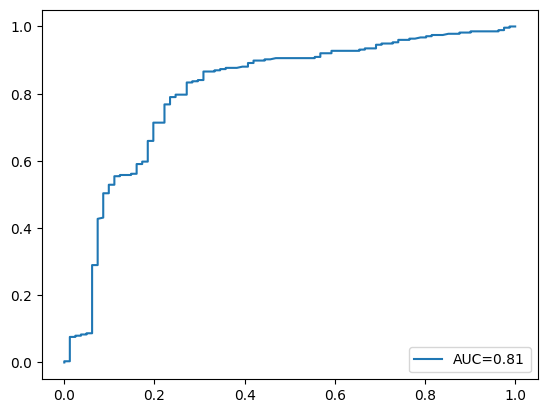

In [90]:
vis.draw_roc_curve_from_probabilities()

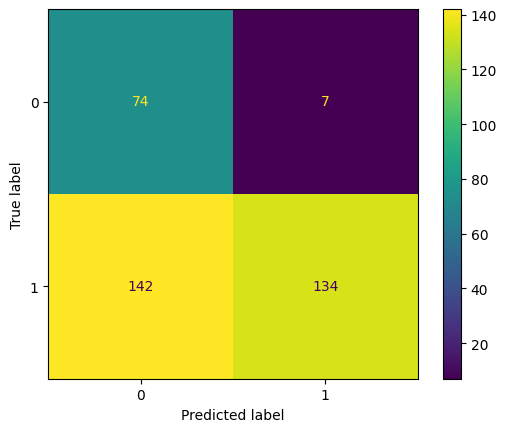

In [91]:
vis.display_confusion_matrix()

In [92]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
RPL10,1.746327e-01
RPL29,1.563329e-01
HLA-E,1.361161e-01
BTF3,1.310466e-01
VIM,6.333400e-02
...,...
SNAI3-AS1,2.595301e-05
SNAI1,1.012039e-05
MYCN,5.815587e-06
MYCBPAP,2.670914e-06


### Cut by mean with classes and biological

In [93]:
brf_model_object = Model(
    brf_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.9970131008811953
Training balanced accuracy 0.998307383821008

Validation roc auc 0.9999640097810195
Training roc auc 0.9999997876463137

Validation precision 0.907730200414426
Training precision 0.9426700445151747

Validation recall 1.0
Training recall 1.0

Validation f1 0.9503893925699703
Training f1 0.9704585995960255



In [94]:
brf_model_object.display_test_results()

Test balanced accuracy 0.8194220790839148

Test roc auc 0.9074521381284667

Test precision 0.9265809906291834

Test recall 0.8816425120772946

Test f1 score 0.9024063115866042


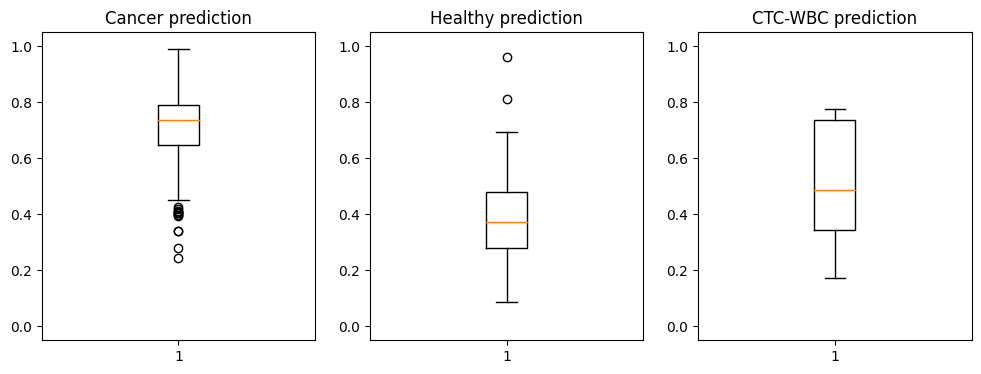

In [95]:
vis = Visualisation(brf_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

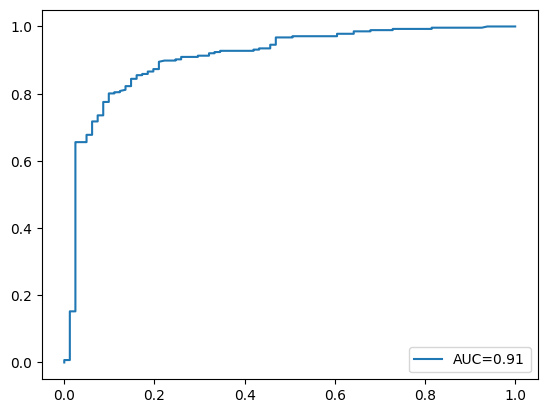

In [96]:
vis.draw_roc_curve_from_probabilities()

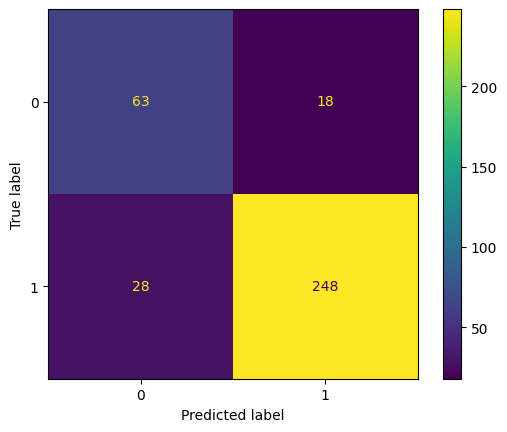

In [97]:
vis.display_confusion_matrix()

In [98]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
RPL26,0.149929
RPS15A,0.131994
RPS26,0.097862
ACTB,0.090995
HLA-C,0.085374
...,...
SNAI1,0.000052
SNAI3-AS1,0.000031
MYCBPAP,0.000008
SNAI2,0.000002
